<a href="https://colab.research.google.com/github/lynnido/labs/blob/main/Lab_04_hedonic_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [51]:
! git clone https://github.com/DS3001/linearRegression

fatal: destination path 'linearRegression' already exists and is not an empty directory.


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


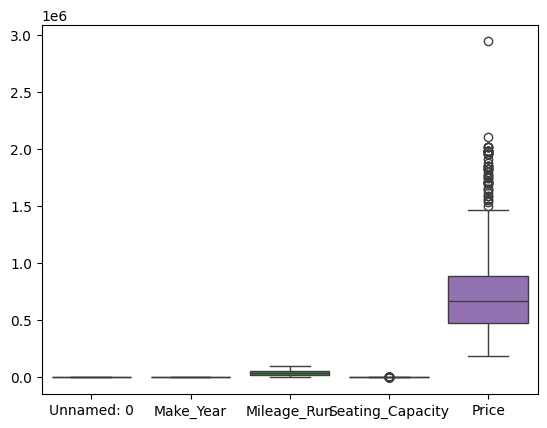

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('./linearRegression/04_hedonic_pricing/cars_hw.csv')
df0 = df
sns.boxplot(data = df)
df.head()

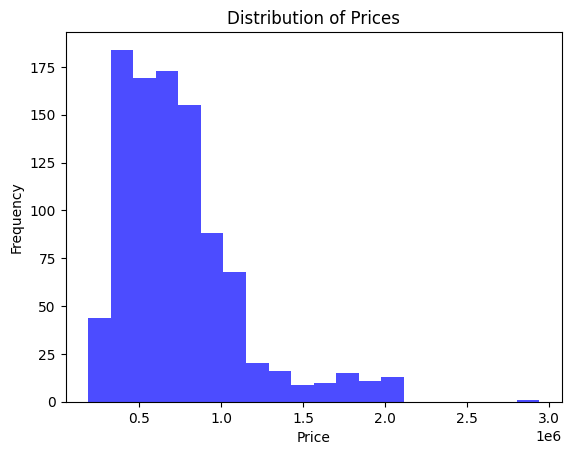

In [53]:
# Histogram of Price
plt.hist(df['Price'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

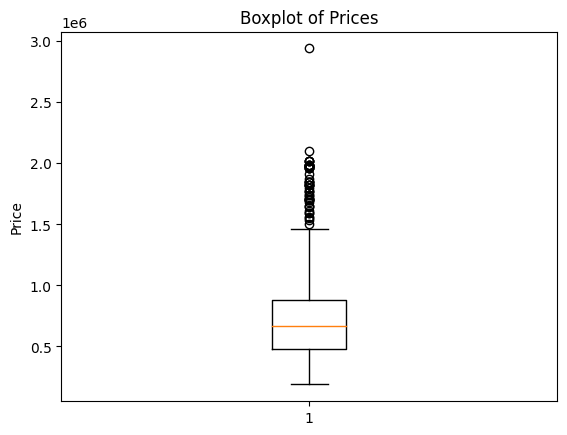

In [54]:
# Boxplot of Price
plt.boxplot(df['Price'])
plt.title('Boxplot of Prices')
plt.ylabel('Price')
plt.show()

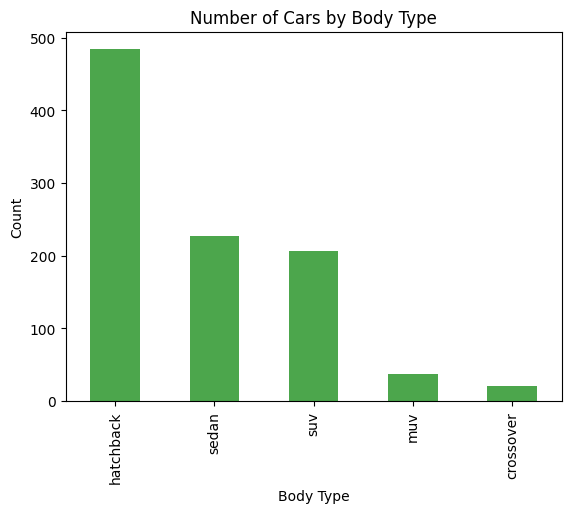

In [55]:
# Bar chart for Body_Type
df['Body_Type'].value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title('Number of Cars by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.show()

In [56]:
df.loc[:,['Price','Body_Type'] ].groupby('Body_Type').describe()

Price                                                              \
           count          mean            std       min       25%        50%   
Body_Type                                                                      
crossover   21.0  7.050952e+05   72849.780207  608000.0  638000.0   706000.0   
hatchback  484.0  5.339773e+05  173086.729837  188000.0  401750.0   509000.0   
muv         38.0  6.264211e+05  184093.488526  328000.0  489750.0   621500.0   
sedan      227.0  8.097841e+05  286736.770092  368000.0  598000.0   772000.0   
suv        206.0  1.176495e+06  417479.028217  559000.0  860000.0  1065000.0   

                                 
                 75%        max  
Body_Type                        
crossover   749000.0   883000.0  
hatchback   661000.0  1107000.0  
muv         738500.0  1091000.0  
sedan       968500.0  2941000.0  
suv        1491250.0  2100000.0

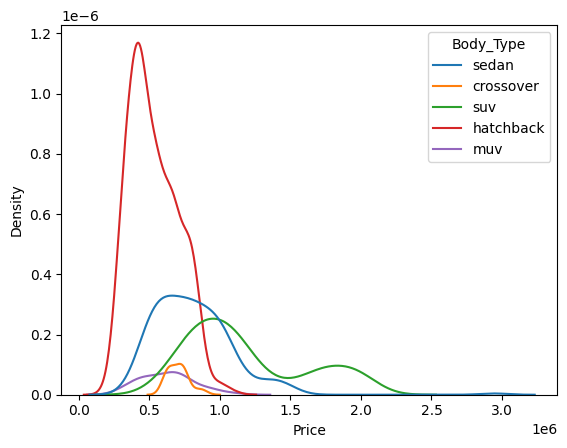

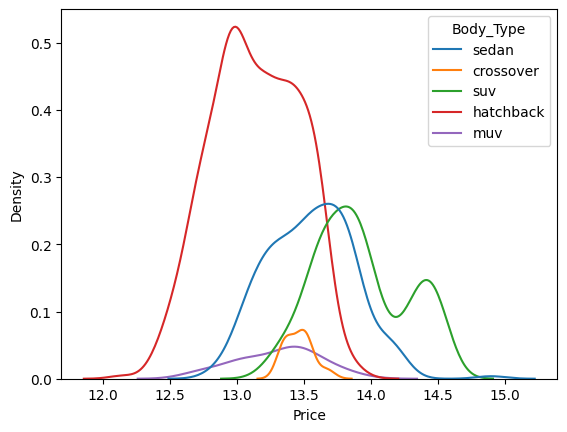

In [57]:
sns.kdeplot(x=df['Price'], hue=df['Body_Type'])
plt.show()

sns.kdeplot(x=np.log(df['Price']), hue=df['Body_Type'])
plt.show()

SUV's seems to be the most expensive with an average of 1,176,495 USD. The maximum price for an SUV is 2,100,000 USD.

In [58]:
y = df['Price']
X = pd.get_dummies(df['Body_Type'], dtype = 'int')

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,crossover,7.050952e+05
1,hatchback,5.339773e+05
2,muv,6.264211e+05
3,sedan,8.097841e+05
4,suv,1.176495e+06


In [59]:
y = df['Price']
X = pd.get_dummies(df['Body_Type'], dtype = 'int', drop_first = True)

from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,hatchback,-171117.965368
1,muv,-78674.185464
2,sedan,104688.902874
3,suv,471399.907536


In [60]:
print(reg.intercept_)

705095.2380952379


Dropped the Crossover variable. The Crossover coefficient from the previous regression became the intercept for this value.

In [61]:
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_+reg.intercept_})
results

,variable,coefficient
0,hatchback,5.339773e+05
1,muv,6.264211e+05
2,sedan,8.097841e+05
3,suv,1.176495e+06


In [62]:
# 80/20 train-test split
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Mileage_Run', 'Body_Type']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

Z_train = pd.concat([X_train['Mileage_Run'], pd.get_dummies(X_train['Body_Type'], dtype = 'int')], axis = 1)
Z_test = pd.concat([X_test['Mileage_Run'], pd.get_dummies(X_test['Body_Type'], dtype = 'int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept = False).fit(Z_train, y_train)

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test, y_test))

rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

Rsq:  0.5421830657180235
RMSE:  250723.9145756946


,variable,coefficient
0,Mileage_Run,-3.825953e+00
1,crossover,8.609993e+05
2,hatchback,6.811182e+05
3,muv,7.551619e+05
4,sedan,9.794033e+05
5,suv,1.321582e+06


In [63]:
100*(-3.825953) + 1321582

1321199.4047

The $R^2$ on the test set is about 0.542. The RMSE on the test set is about 250723.915. The coefficent on "Mileage_Run" is -3.825953.

The most expensive kind of body type for the mileage is an SUV for about $1321199.40.

<Axes: >

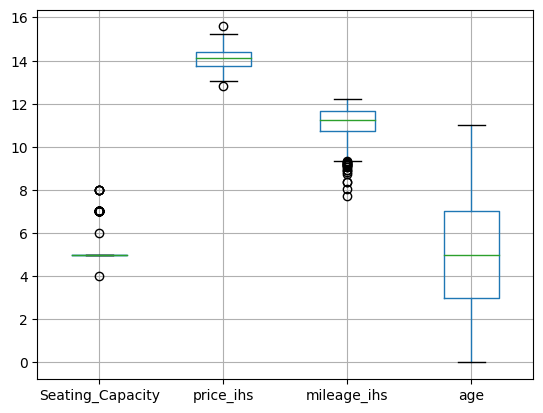

In [64]:
#linear model
df['price_ihs'] = np.arcsinh(df['Price'])
df['mileage_ihs'] = np.arcsinh(df['Mileage_Run'])
df['age'] = max(df['Make_Year'])-df['Make_Year']
df = df.drop(['Price', 'Mileage_Run', 'Make_Year', 'Unnamed: 0'], axis = 1)
df.boxplot()

In [65]:
N = df.shape[0]
df = df.sample(frac=1, random_state=100)
train_size = int(.8*N)

df_train = df[0:train_size]
y_train = df_train['mileage_ihs']

df_test = df[train_size:]
y_test = df_test['mileage_ihs']

In [66]:
from sklearn import linear_model

var_n = ['age','mileage_ihs','Seating_Capacity']
X_train_n = df_train.loc[:,var_n]
reg_n = linear_model.LinearRegression().fit(X_train_n,y_train)
X_test_n = df_test.loc[:,var_n]
y_hat = reg_n.predict(X_test_n)
print('Numeric only Rsq: ', reg_n.score(X_test_n,y_test))
rmse_n = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Numeric only RMSE: ', rmse_n)

Numeric only Rsq:  1.0
Numeric only RMSE:  6.085077233605623e-16


In [67]:
var_cat = ['Make','Body_Type','Color','Fuel_Type','Transmission','Transmission_Type']

dummies = pd.DataFrame([])
for var in var_cat:
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)
    X_train_c = dummies.iloc[0:train_size,:]
    X_test_c = dummies.iloc[train_size:,:]

reg_c = linear_model.LinearRegression().fit(X_train_c,y_train)
y_hat_c = reg_c.predict(X_test_c)
print('Categorical only Rsq: ', reg_c.score(X_test_c,y_test))
rmse_c = np.sqrt( np.mean( (y_test - y_hat_c)**2 ))
print('Categorical only RMSE: ', rmse_c)

Categorical only Rsq:  0.11408725983226176
Categorical only RMSE:  0.6531463892874082


In [68]:
X_train_all = pd.concat([X_train_n, X_train_c],axis=1, ignore_index=True)
X_test_all = pd.concat([X_test_n, X_test_c],axis=1, ignore_index=True)

reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)
y_hat_all = reg_all.predict(X_test_all)
print('All Rsq: ', reg_all.score(X_test_all,y_test))
rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
print('All RMSE: ', rmse_all)

All Rsq:  1.0
All RMSE:  2.842850590160962e-15


Joint model preforms the best since it achieves a Rsp of 1 and a RMSE of 2.842850590160962e-15. While the RMSE preforms better for the categorical model, the Rsq is quite low.

In [69]:
from sklearn.preprocessing import PolynomialFeatures

for d in np.arange(1,5):
    expander = PolynomialFeatures(degree=d,include_bias=False)

    Z = expander.fit_transform(X_test_n)
    names = expander.get_feature_names_out()
    X_test_d = pd.DataFrame(data=Z, columns = names)
    Z = expander.fit_transform(X_train_n)
    names = expander.get_feature_names_out()
    X_train_d = pd.DataFrame(data=Z, columns = names)
    X_train_d.reset_index(drop=True, inplace=True)
    X_train_c.reset_index(drop=True, inplace=True)
    X_train_all = pd.concat([X_train_d, X_train_c], axis=1, ignore_index=True)

    X_test_d.reset_index(drop=True, inplace=True)
    X_test_c.reset_index(drop=True, inplace=True)
    X_test_all = pd.concat([X_test_d, X_test_c], axis=1, ignore_index=True)

    reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)
    print(d, ' Rsq: ', reg_all.score(X_test_all,y_test))
    y_hat_all = reg_all.predict(X_test_all)
    rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
    print(d, 'RMSE: ', rmse_all)

1  Rsq:  1.0
1 RMSE:  2.842850590160962e-15
2  Rsq:  1.0
2 RMSE:  6.787924317916784e-15
3  Rsq:  1.0
3 RMSE:  1.4551341395308639e-13
4  Rsq:  0.9999693618730384
4 RMSE:  0.0038410164087248383


As we increase the degree of the expansion for Rsq, it remains at the same rate. However, at degree 4 it decreases in value slightly. I also noticed that the RMSE value decreases greatly at degree 2. Then after degree 2, it begins to go up, and finally at degree 4 the value becomes positive.

<Axes: xlabel='mileage_ihs'>

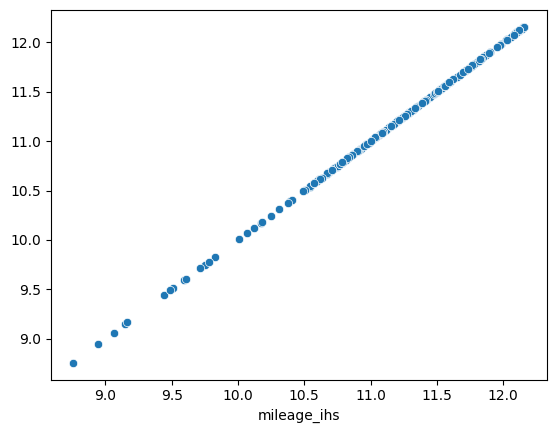

In [70]:
d = 2

expander = PolynomialFeatures(degree=d,include_bias=False)
Z = expander.fit_transform(X_test_n)
names = expander.get_feature_names_out()
X_test_d = pd.DataFrame(data=Z, columns = names)

Z = expander.fit_transform(X_train_n)
names = expander.get_feature_names_out()
X_train_d = pd.DataFrame(data=Z, columns = names)

X_train_d.reset_index(drop=True, inplace=True)
X_train_c.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train_d, X_train_c], axis=1)
X_train_all.columns = X_train_all.columns.astype(str)

X_test_d.reset_index(drop=True, inplace=True)
X_test_c.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test_d, X_test_c], axis=1)
X_test_all.columns = X_test_all.columns.astype(str)

reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)

y_hat_all = reg_all.predict(X_test_all)
residuals = y_test - y_hat_all


sns.scatterplot(x=y_test,y=y_hat_all)

The predicited values and true values seem to line up very well. Almost perfectly around the diagonal.

<Axes: xlabel='mileage_ihs', ylabel='Density'>

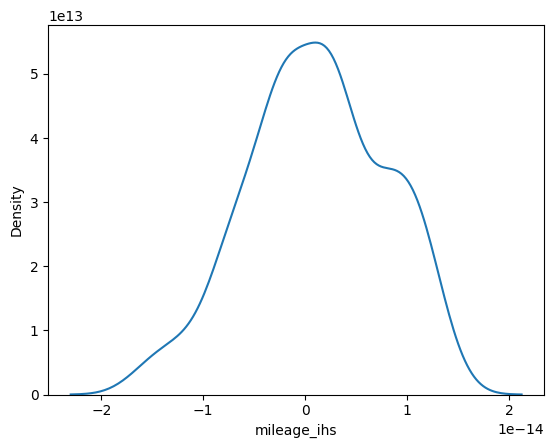

In [71]:
sns.kdeplot(residuals)

The residual looks a bit bi-modal around zero. With the main peak at zero. The two peaks can suggest that by doing test-trian split these peaks could disappear.

Overall, after analyzing the data it can be concluded that the data can be overfitting since the training RMSE value is much lower than the test RMSE.